# Project: Exploring and Predicting with a Dataset

> Author: Aakanksha Verma, Hulya Yasar, Miguel Dela Cruz

> Course: LE/EECS 3401 A | Introduction to Articical Intelligence and Logic Programming

**Original Dataset Source: Kadiwal,Aditya. (2020). Water Quailty. Kaggle. https://www.kaggle.com/datasets/adityakadiwal/water-potability.**

**Uploaded and used from: https://raw.githubusercontent.com/Verma-Aakanksha/EECS3401-Project/main/water_potability.csv**

# 1: Look at the Big Picture and Frame the Problem.

## Frame the Problem
1. Supervised learning – training examples are labeled.
2. A classification task – predict a category.
3. Batch learning 
    - Small data set
    - No continuous flow of data coming into the system
    - No need to adjust to changing data rapidly

## Look at the big picture
Predictions will be used to help inform people if the body of water is drinkable. This will be done through the following properties of the water: pH value, hardness, solids, chloramines, sulfate, conductivity, organic carbon, trihalomethanes, turbidity.

# 2: Description of the Dataset and Three Graphs of EDA.

In [748]:
# Import libraries

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [749]:
# Load the dataset

url = "https://raw.githubusercontent.com/Verma-Aakanksha/EECS3401-Project/main/water_potability.csv"
water = pd.read_csv(url, sep=',')

# Let's create a backup copy of the dataset
water_backup = water

## Water Quailtiy Dataset Description

**Attributes for dataset:**
The below attributes are copied **AS IS** from the original dataset.

1. <u>_pH value:_</u>
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. <u>_Hardness:_</u>
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. <u>_Solids (Total dissolved solids - TDS):_</u>
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. <u>_Chloramines:_</u>
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. <u>_Sulfate:_</u>
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. <u>_Conductivity:_</u>
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. <u>_Organic_carbon:_</u>
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. <u>_Trihalomethanes:_</u>
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. <u>_Turbidity:_</u>
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. <u>_Potability:_</u>
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

**Missing values:** 
- ph : 491
- Sulfate: 781
- Trihalomethanes: 162

**Duplicated values:** There are no duplicate values in the dataset.

## Take a quick look at the data structure

In [750]:
water

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [751]:
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [752]:
water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [753]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [754]:
water.shape

(3276, 10)

In [755]:
water["Potability"].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

## Exploring and visualizing the data to gain insights.


### Plot a histogram of the data using hist()

The towers or bars of a histogram are called bins. The height of each bin shows how many values from that data fall into that range. 

Width of each bin is = (max value of data – min value of data) / total number of bins
    - age bin width = (22-15)/20 = 0.35

The default value of the number of bins to be created in a histogram is 10. However, we can change the size of bins using the parameter bins

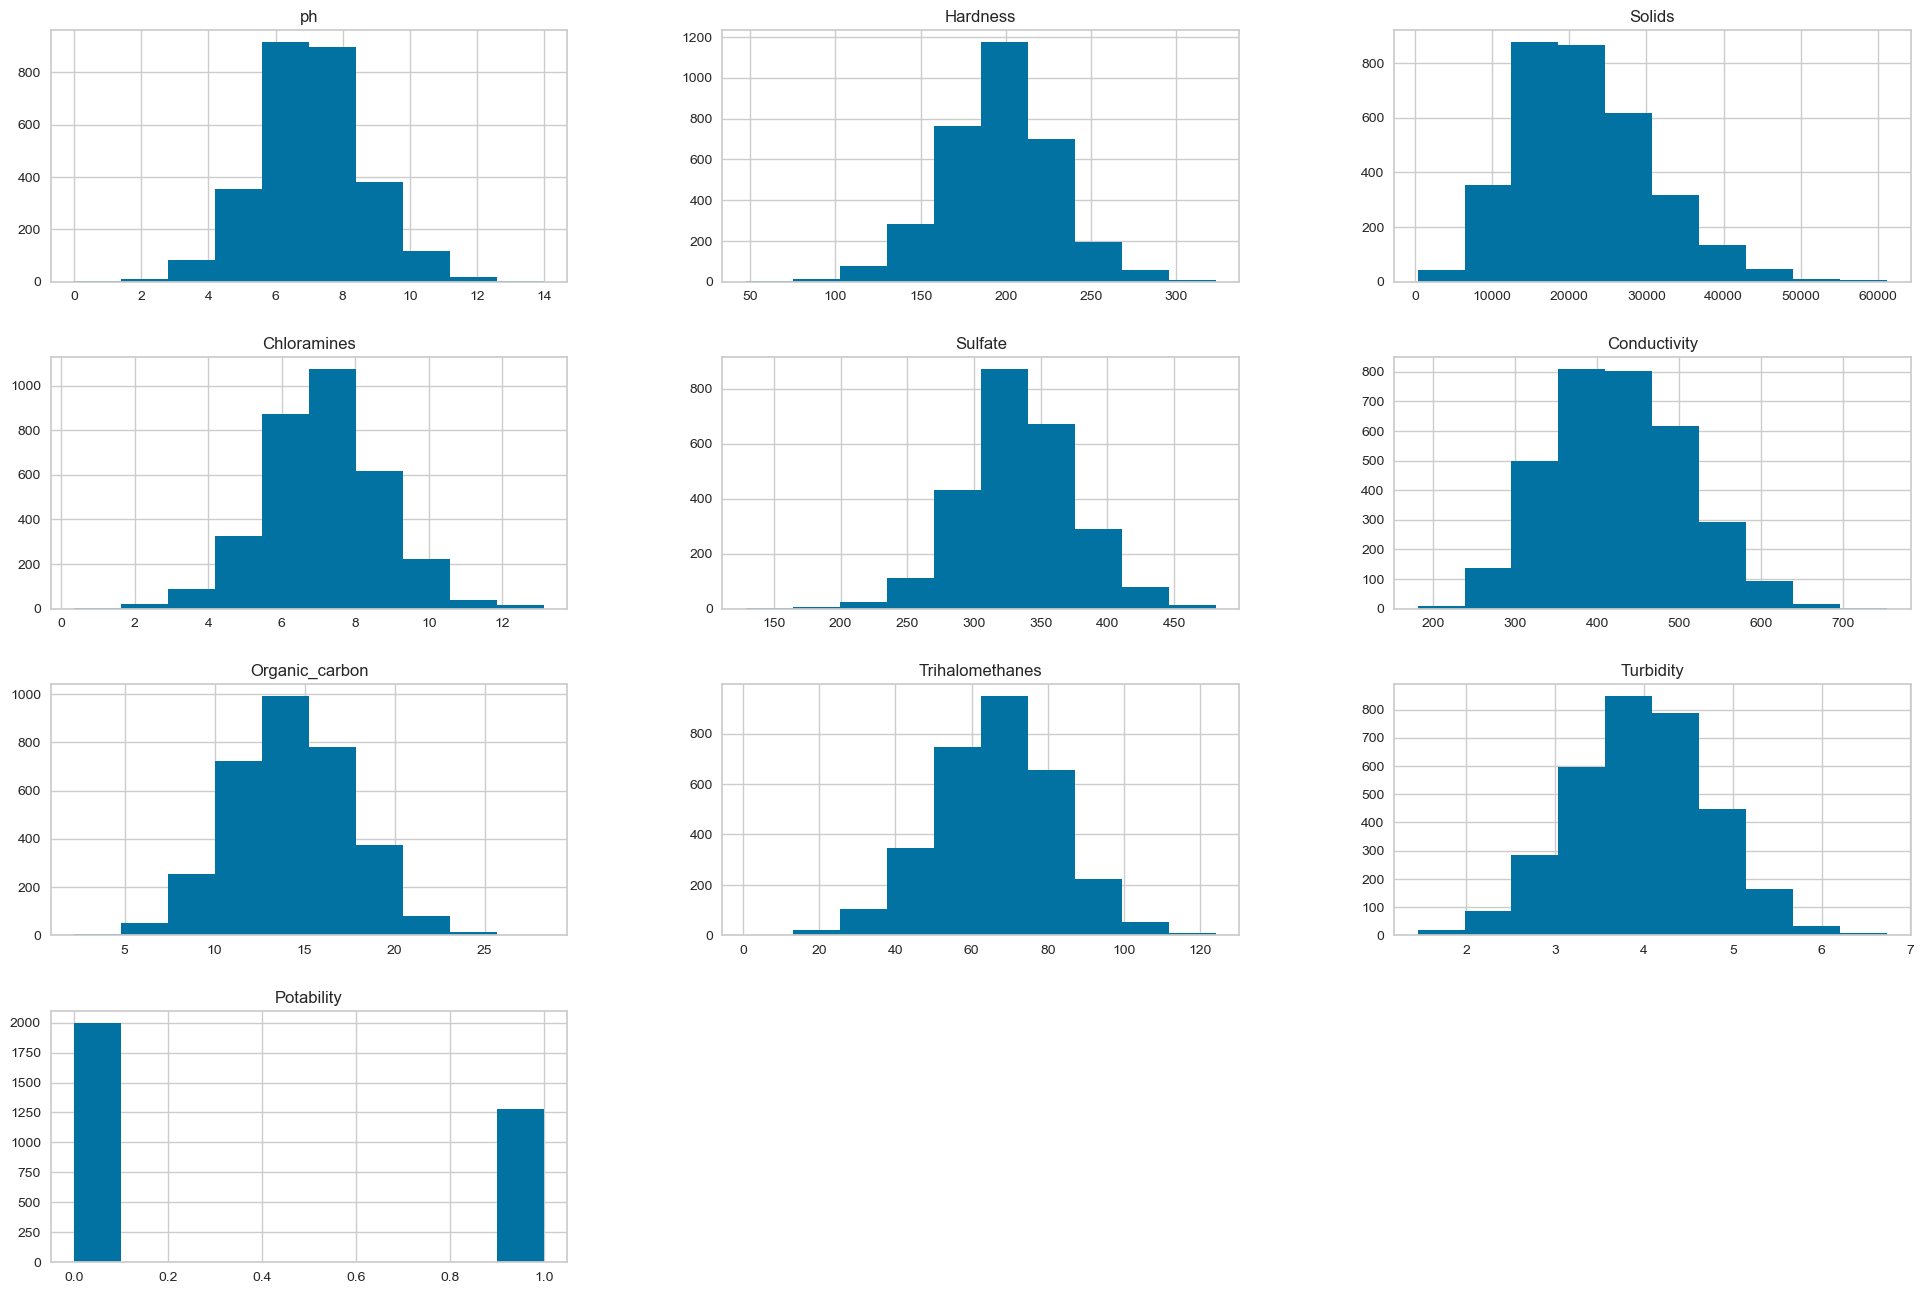

In [756]:
water.hist(figsize=(24, 16))
plt.show()

Note that these attributes have very different scales. We will scale these attributes later.

### Look for correlations between the features

/Users/migo/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


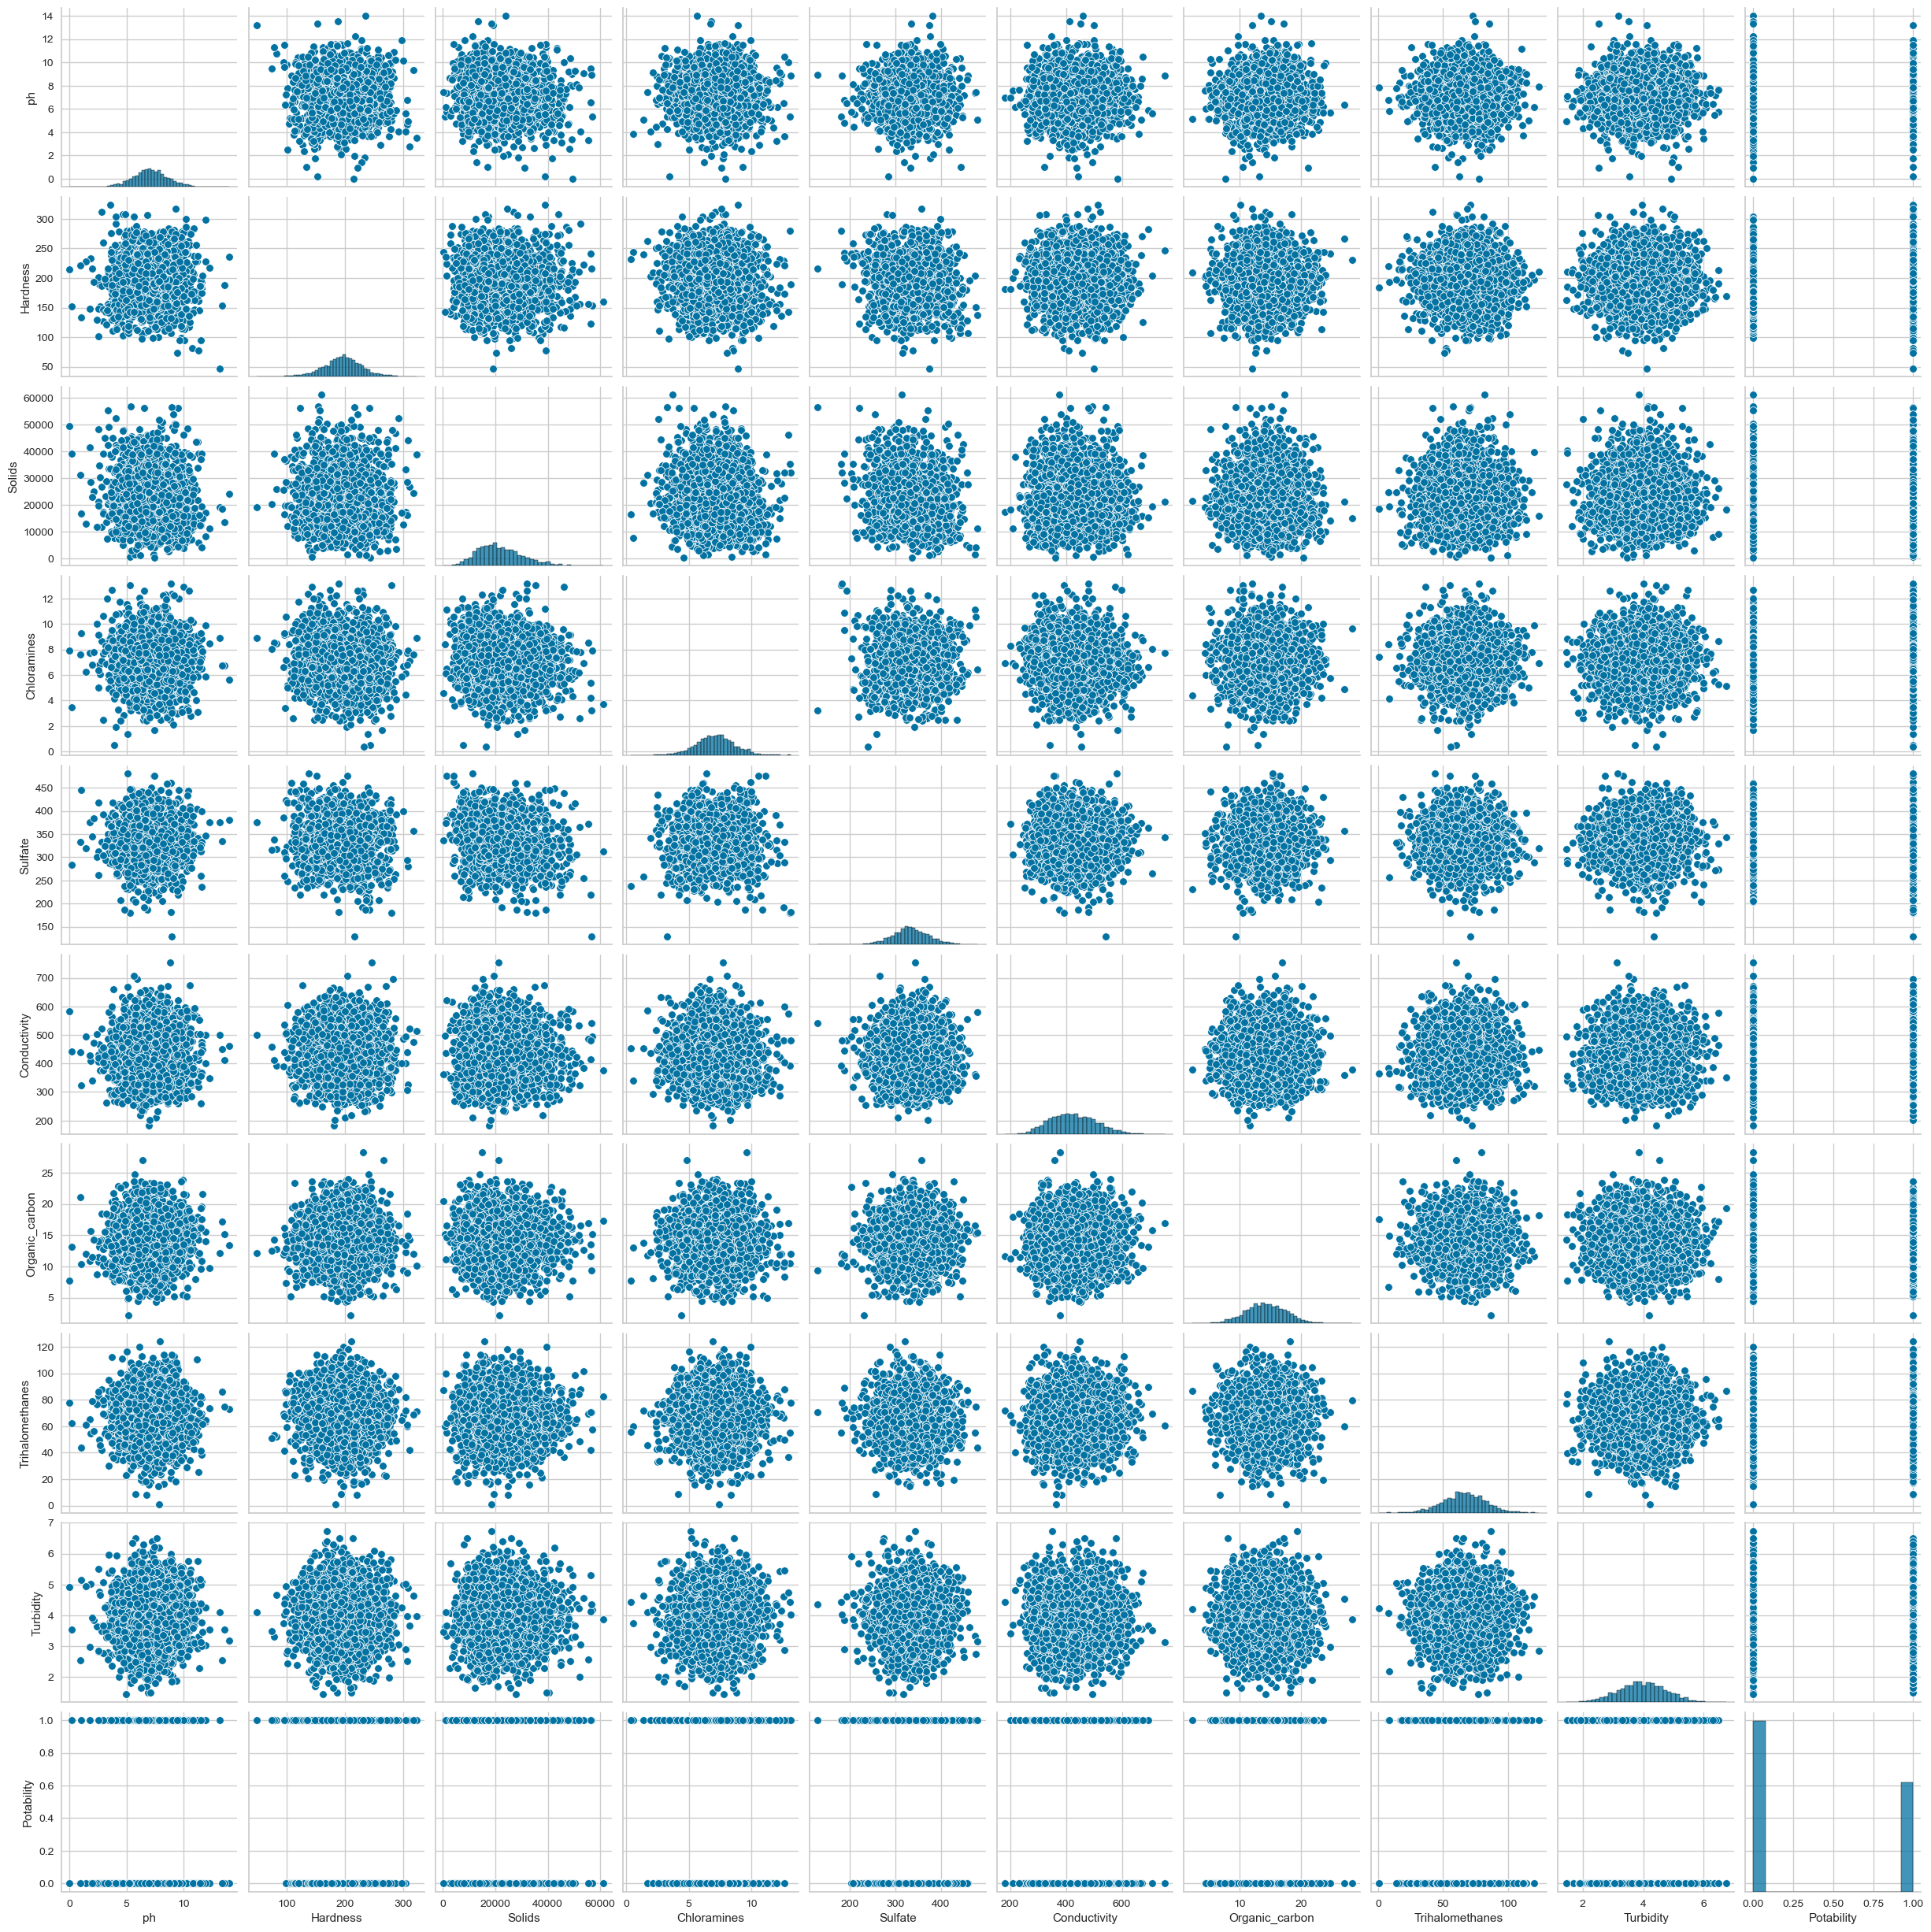

In [757]:
# Check for correlation between attributes using sns.pairplot.
sns.pairplot(water)

### Look for correlations using Pearson correlation coefficient.

In [758]:
#corr method has pearson standard correlation coefficient as the default 

corr_matrix = water.corr(numeric_only=True)
corr_matrix

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


#### Let's look at correlations with regard to our target

In [759]:
corr_matrix["Potability"].sort_values(ascending=False)

Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.007130
Turbidity          0.001581
ph                -0.003556
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.023577
Organic_carbon    -0.030001
Name: Potability, dtype: float64

<Axes: >

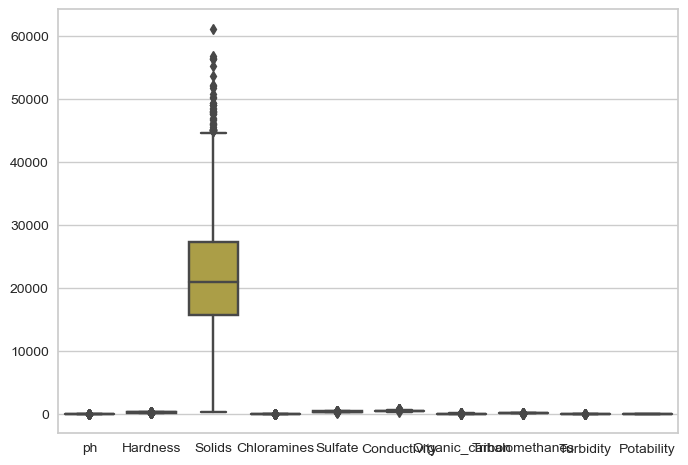

In [760]:
sns.boxplot(data=water)

/Users/migo/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


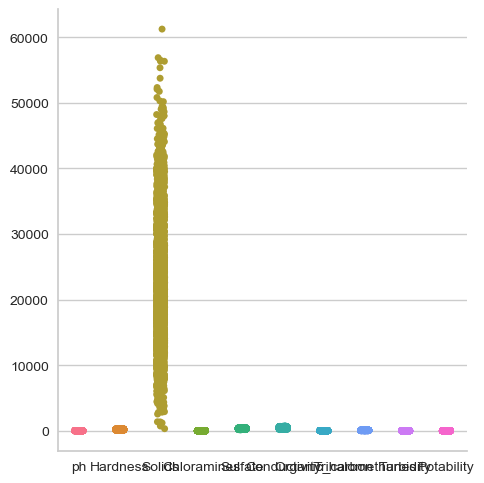

In [761]:
sns.catplot(data=water)

<Axes: >

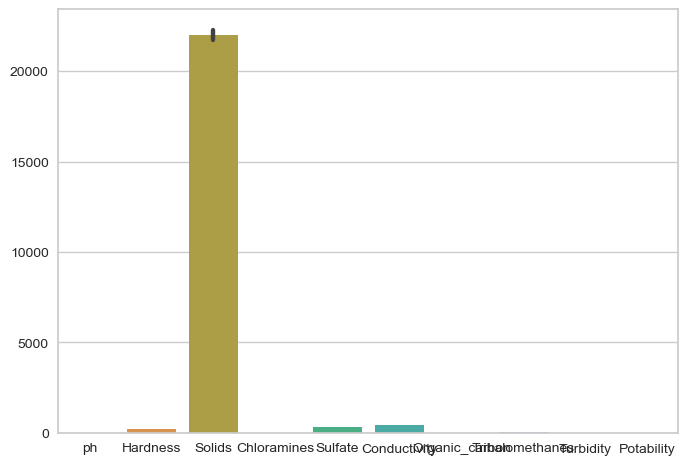

In [762]:
sns.barplot(data=water)

Text(0, 0.5, 'Potability')

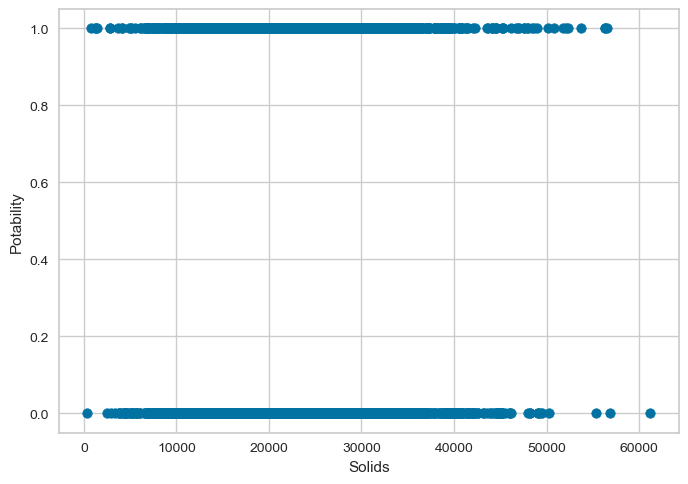

In [763]:
# Create a scatterplot of G2 and G3

X = water["Solids"]
y = water["Potability"]
# Plot points
fig, pl = plt.subplots()
pl.scatter(X, y, color = 'b')
plt.xlabel("Solids")
plt.ylabel("Potability")


# 3: Data Cleaning and Preprocessing

## Data Cleaning: duplicate and missing values and how to deal with them

### Check for duplicate rows and remove them if any.

In [764]:
# Check for duplicate rows and delete them
water.duplicated().sum()

0

### Handling the missing values

In [765]:
# Find the number of missing values in each column
water.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

There are 2 ways that we will look at the data now.

1. We will delete both 'ph' and 'Sulfate' columns and have 'Trihalomethanes' missing values filled with mean values.
2. We will fill in mean values for all missing values.

#### 1. Deleting 'ph' and 'Sulfate' Columns

In [766]:
# Create a variable to store the water information, and use it for futher calculations.
water_removedColumns = water.copy()
water_removedColumns.drop(labels=['ph','Sulfate'], axis=1, inplace=True)

In [767]:
# 'ph' and 'Sulfate' columns have been removed, checking info to varify
water_removedColumns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Hardness         3276 non-null   float64
 1   Solids           3276 non-null   float64
 2   Chloramines      3276 non-null   float64
 3   Conductivity     3276 non-null   float64
 4   Organic_carbon   3276 non-null   float64
 5   Trihalomethanes  3114 non-null   float64
 6   Turbidity        3276 non-null   float64
 7   Potability       3276 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 204.9 KB


In [768]:
# Checking that only 'Trihalomethanes' is the only column with missing values in water_removedColumns
water_removedColumns.isna().sum()

Hardness             0
Solids               0
Chloramines          0
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [769]:
# Checking that water still has all 3 columns with missing values.
water.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

For the remaining missing values, we will fill them with the mean value. We will do this through creating a pipeline, that will also scale the features and perform encoding in the next step.

Ways 1 and 2 will be now shown in the pipeline as the data is now cleaned up according to their requirements.


## Processing: Create a Pipeline and Apply it to Data

In [770]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

#### 1. Deleting 'ph' and 'Sulfate' Columns

In [771]:
# Create the num columns, we do not have any categorical data so configuration for that is not needed.

num_cols_wrc = water_removedColumns.select_dtypes(include='number').columns.to_list()
# cat_cols_wrc = water_removedColumns.select_dtypes(exclude='number').columns.to_list()

# Exclude the target from numerical columns
num_cols_wrc.remove("Potability")

# Create pipelines for numeric and categorical columns
num_pipeline_wrc = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
# cat_pipeline_wrc = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

# Use ColumnTransformer to set the estimators and transformations

preprocessing_wrc = ColumnTransformer([('num', num_pipeline_wrc, num_cols_wrc)],
                                      #  ('cat', cat_pipeline_wrc, cat_cols_wrc)],
                                       remainder='passthrough'
                                     )

In [772]:
num_cols_wrc

['Hardness',
 'Solids',
 'Chloramines',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']

In [773]:
# cat_cols_wrc

##### Display Water_RemovedColumns Pipeline

In [774]:
preprocessing_wrc

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Hardness', 'Solids', 'Chloramines',
                                  'Conductivity', 'Organic_carbon',
                                  'Trihalomethanes', 'Turbidity'])])

##### Applying Processing Pipeline

In [775]:
wrc_prepared = preprocessing_wrc.fit_transform(water_removedColumns)

# Scikit-learn strips the column headers, so just add them back on afterward.
wrc_feature_names = preprocessing_wrc.get_feature_names_out()
wrc_prepared = pd.DataFrame(data = wrc_prepared, columns = wrc_feature_names)

wrc_prepared

,num__Hardness,num__Solids,num__Chloramines,num__Conductivity,num__Organic_carbon,num__Trihalomethanes,num__Turbidity,remainder__Potability
0,0.259195,-0.139471,0.112415,1.708954,-1.180651,1.306149,-1.286298,0.0
1,-2.036414,-0.385987,-0.307694,2.062575,0.270597,-0.638480,0.684218,0.0
2,0.847665,-0.240047,1.360594,-0.094032,0.781117,0.001509,-1.167365,0.0
3,0.547651,0.000493,0.592008,-0.778830,1.255134,2.152874,0.848412,0.0
4,-0.464429,-0.460249,-0.363698,-0.343939,-0.824357,-2.181599,0.138786,0.0
...,...,...,...,...,...,...,...,...
3271,-0.081758,2.916188,0.028027,1.240155,-0.118075,0.018481,0.601124,1.0
3272,-0.085667,-0.534295,0.593290,-0.417706,1.698560,0.000000,-1.497627,1.0
3273,-0.626829,1.270810,0.144017,0.072263,-0.981329,0.218748,-0.856007,1.0
3274,1.041355,-1.144058,-0.517373,-0.288597,-0.942064,0.703468,0.950797,1.0


In [776]:
wrc_prepared.columns

Index(['num__Hardness', 'num__Solids', 'num__Chloramines', 'num__Conductivity',
       'num__Organic_carbon', 'num__Trihalomethanes', 'num__Turbidity',
       'remainder__Potability'],
      dtype='object')

#### 2. Fill in Mean Values for All Missing Values

In [777]:
# Create the num columns, we do not have any categorical data so configuration for that is not needed.

num_cols = water.select_dtypes(include='number').columns.to_list()
# cat_cols = water.select_dtypes(exclude='number').columns.to_list()


# Exclude the target from numerical columns
num_cols.remove("Potability")

# Create pipelines for numeric and categorical columns
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
# cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

# Use ColumnTransformer to set the estimators and transformations

preprocessing = ColumnTransformer([('num', num_pipeline, num_cols)],
                                 #   ('cat', cat_pipeline, cat_cols)],
                                    remainder='passthrough'
                                 )

In [778]:
num_cols

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']

In [779]:
# cat_cols

##### Display Water Pipeline

In [780]:
# Show the pipeline
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['ph', 'Hardness', 'Solids', 'Chloramines',
                                  'Sulfate', 'Conductivity', 'Organic_carbon',
                                  'Trihalomethanes', 'Turbidity'])])

##### Apply Processing Pipeline

In [781]:
# Apply the preprocessing pipeline on the dataset

water_prepared = preprocessing.fit_transform(water)

# Scikit-learn strips the column headers, so just add them back on afterward.
feature_names=preprocessing.get_feature_names_out()
water_prepared = pd.DataFrame(data=water_prepared, columns=feature_names)

water_prepared

,num__ph,num__Hardness,num__Solids,num__Chloramines,num__Sulfate,num__Conductivity,num__Organic_carbon,num__Trihalomethanes,num__Turbidity,remainder__Potability
0,-6.043133e-16,0.259195,-0.139471,0.112415,9.613574e-01,1.708954,-1.180651,1.306149,-1.286298,0.0
1,-2.289339e+00,-2.036414,-0.385987,-0.307694,1.572994e-15,2.062575,0.270597,-0.638480,0.684218,0.0
2,6.928678e-01,0.847665,-0.240047,1.360594,1.572994e-15,-0.094032,0.781117,0.001509,-1.167365,0.0
3,8.409504e-01,0.547651,0.000493,0.592008,6.395190e-01,-0.778830,1.255134,2.152874,0.848412,0.0
4,1.368569e+00,-0.464429,-0.460249,-0.363698,-6.541765e-01,-0.343939,-0.824357,-2.181599,0.138786,0.0
...,...,...,...,...,...,...,...,...,...,...
3271,-1.641587e+00,-0.081758,2.916188,0.028027,7.242640e-01,1.240155,-0.118075,0.018481,0.601124,1.0
3272,4.953704e-01,-0.085667,-0.534295,0.593290,1.572994e-15,-0.417706,1.698560,0.000000,-1.497627,1.0
3273,1.591254e+00,-0.626829,1.270810,0.144017,1.572994e-15,0.072263,-0.981329,0.218748,-0.856007,1.0
3274,-1.329516e+00,1.041355,-1.144058,-0.517373,1.572994e-15,-0.288597,-0.942064,0.703468,0.950797,1.0


In [782]:
water_prepared.columns

Index(['num__ph', 'num__Hardness', 'num__Solids', 'num__Chloramines',
       'num__Sulfate', 'num__Conductivity', 'num__Organic_carbon',
       'num__Trihalomethanes', 'num__Turbidity', 'remainder__Potability'],
      dtype='object')

# 4. Training and Evaluation of Three Machine Learning Algorithms, Analyzing findings, and Compare Results

## 1. Deleting 'ph' and 'Sulfate' Columns

### Split the dataset into a training dataset (80%) and testing dataset.

In [783]:
from sklearn.model_selection import train_test_split

X_wrc = wrc_prepared.drop(["remainder__Potability"], axis=1)
y_wrc = wrc_prepared["remainder__Potability"]

X_wrc_train, X_wrc_test, y_wrc_train, y_wrc_test = train_test_split(X_wrc, y_wrc, test_size=0.2, random_state=42)
print(X_wrc_train.shape, y_wrc_train.shape, X_wrc_test.shape, y_wrc_test.shape)

(2620, 7) (2620,) (656, 7) (656,)


### Train a SVM Model (SVC) 
Using: kernel = rbf, gamma = 1, and C = 0.1

In [784]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Training SVM Model
wrc_svm_model = SVC(kernel='rbf', C=0.1, gamma=1)
wrc_svm_model.fit(X_wrc_train, y_wrc_train.values.ravel())
wrc_svm_model


SVC(C=0.1, gamma=1)

### Train a Random Forest Model

In [785]:
from sklearn.metrics import RocCurveDisplay
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# Training Random Forest Model
wrc_random_forest_model = RandomForestClassifier()
wrc_random_forest_model.fit(X_wrc_train, y_wrc_train)
wrc_random_forest_model

RandomForestClassifier()

### Train a Gradient Boosting Model

In [786]:
# Training Gradient Boosting Model
wrc_gradient_boosting_model = GradientBoostingClassifier()
wrc_gradient_boosting_model.fit(X_wrc_train, y_wrc_train)
wrc_gradient_boosting_model

GradientBoostingClassifier()

### Test Models on the X_wrc_Test

In [787]:
# Testing the model
wrc_svm_y_predict = wrc_svm_model.predict(X_wrc_test)
wrc_random_forest_y_predict = wrc_random_forest_model.predict(X_wrc_test)
wrc_gradient_boosting_y_predict = wrc_gradient_boosting_model.predict(X_wrc_test)

### Report the Classification_Report  and Accuracy of Each Model on the y_wrc_test and y_wrc_predict.

In [788]:
# Evaluate model performances
wrc_models = [wrc_svm_model, wrc_random_forest_model, wrc_gradient_boosting_model]
wrc_predicts = [wrc_svm_y_predict, wrc_random_forest_y_predict, wrc_gradient_boosting_y_predict]
wrc_model_names = ['SVM', 'Random Forest', 'Gradient Boosting']

for model, predict, name in zip(wrc_models, wrc_predicts, wrc_model_names):
    accuracy = accuracy_score(y_wrc_test, predict)
    print(f"------ {name} ------")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(classification_report(y_wrc_test, predict))

------ SVM ------
Accuracy: 0.6280487804878049
Classification Report:
              precision    recall  f1-score   support

         0.0       0.63      1.00      0.77       412
         1.0       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656

------ Random Forest ------
Accuracy: 0.6112804878048781
Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      0.85      0.73       412
         1.0       0.45      0.21      0.29       244

    accuracy                           0.61       656
   macro avg       0.55      0.53      0.51       656
weighted avg       0.57      0.61      0.57       656

------ Gradient Boosting ------
Accuracy: 0.6097560975609756
Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      0.89      0.74       412
   

/Users/migo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/migo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/migo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 2. Fill in Mean Values for All Missing Values

### Split the dataset into a training dataset (80%) and testing dataset.

In [789]:
from sklearn.model_selection import train_test_split

X = water_prepared.drop(["remainder__Potability"], axis=1)
y = water_prepared["remainder__Potability"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2620, 9) (2620,) (656, 9) (656,)


### Train a SVM Model (SVC) 
Using: kernel = rbf, gamma = 1, and C = 0.1

In [790]:


# Training SVM Model
svm_model = SVC(kernel='rbf', C=0.1, gamma=1)
svm_model.fit(X_train, y_train.values.ravel())
svm_model


SVC(C=0.1, gamma=1)

### Train a Random Forest Model

In [791]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
# Training Random Forest Model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
random_forest_model

RandomForestClassifier()

### Train a Gradient Boosting Model

In [792]:
# Training Gradient Boosting Model
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train, y_train)
gradient_boosting_model

GradientBoostingClassifier()

### Test Models on the X_Test

In [793]:
# Testing the model
svm_y_predict = svm_model.predict(X_test)
random_forest_y_predict = random_forest_model.predict(X_test)
gradient_boosting_y_predict = gradient_boosting_model.predict(X_test)

### Report the Classification_Report  and Accuracy of Each Model on the y_wrc_test and y_wrc_predict.

In [794]:
# Evaluate model performances
models = [svm_model, random_forest_model, gradient_boosting_model]
predicts = [svm_y_predict, random_forest_y_predict, gradient_boosting_y_predict]
model_names = ['SVM', 'Random Forest', 'Gradient Boosting']

for model, predict, name in zip(models, predicts, model_names):
    accuracy = accuracy_score(y_test, predict)
    print(f"------ {name} ------")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(classification_report(y_test, predict))

------ SVM ------
Accuracy: 0.6280487804878049
Classification Report:
              precision    recall  f1-score   support

         0.0       0.63      1.00      0.77       412
         1.0       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656

------ Random Forest ------
Accuracy: 0.6783536585365854
Classification Report:
              precision    recall  f1-score   support

         0.0       0.69      0.88      0.77       412
         1.0       0.62      0.34      0.44       244

    accuracy                           0.68       656
   macro avg       0.66      0.61      0.61       656
weighted avg       0.67      0.68      0.65       656

------ Gradient Boosting ------
Accuracy: 0.6585365853658537
Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.90      0.77       412
   

/Users/migo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/migo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/migo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 5. Three Graphs for the Best Performing Algorithm

What is the best algorithm?

I think it is the 2nd way random forest, as it has 68% accuracy compared to the 1st way. The SVC has the same thing for both, and the gradient boosting also is better in 2nd way but random forest is higher.

### ROC Curve
* 'pip install yellowbrick' run this on your terminal so you can run these graphs.

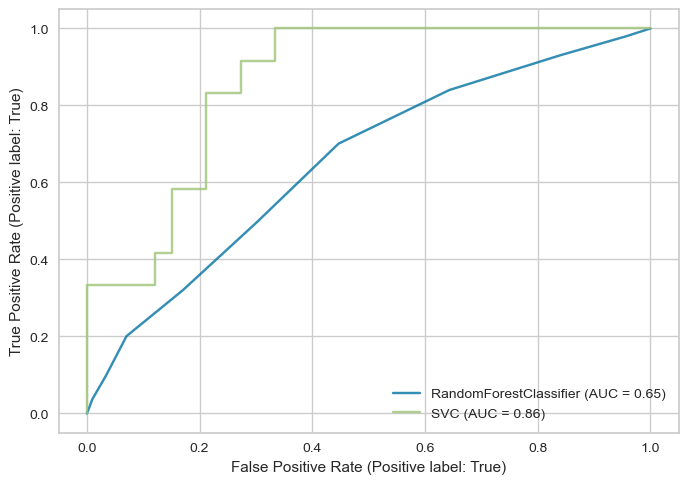

In [795]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)

ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)


### Confusion Matrix

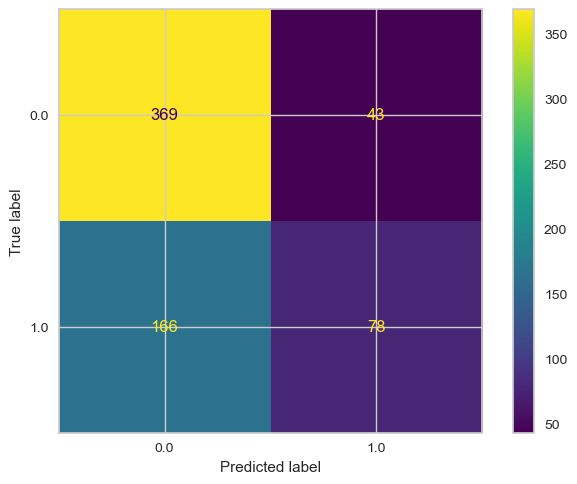

In [743]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

### Logistic Regression Confusion Matrix

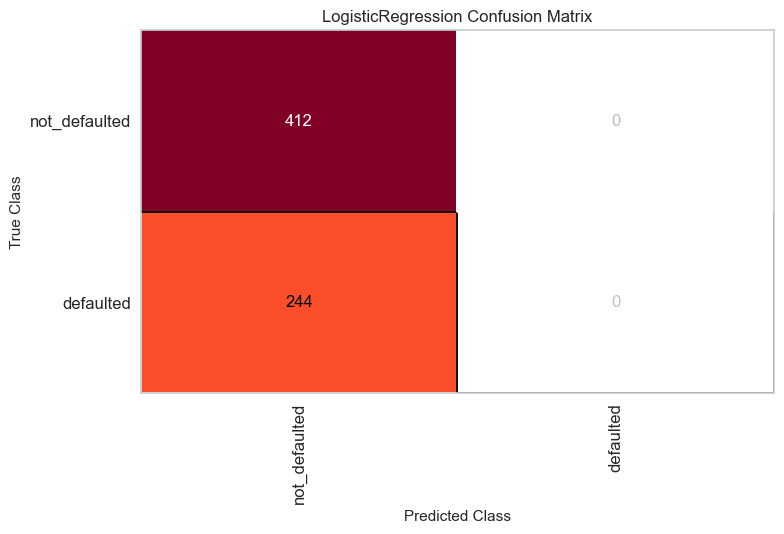

<Figure size 800x550 with 0 Axes>

In [643]:

from sklearn.linear_model import LogisticRegression
# Instantiate the visualizer with the classification model
confusion_matrix(
    LogisticRegression(),
    X_train, y_train, X_test, y_test,
    classes=['not_defaulted', 'defaulted']
)
plt.tight_layout()

### Precision-Recall Ridge Classifyer

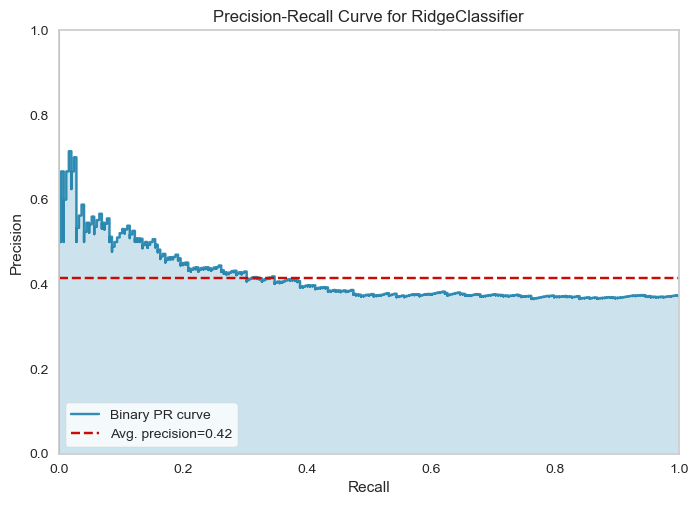

<Axes: title={'center': 'Precision-Recall Curve for RidgeClassifier'}, xlabel='Recall', ylabel='Precision'>

In [633]:
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeClassifier
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.model_selection import train_test_split as tts

# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(RidgeClassifier(random_state=0))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

### Cook's Distance

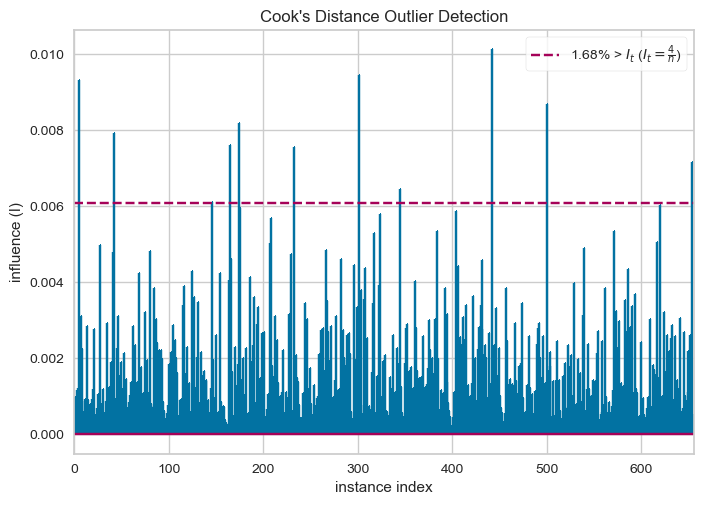

<Axes: title={'center': "Cook's Distance Outlier Detection"}, xlabel='instance index', ylabel='influence (I)'>

In [797]:
from yellowbrick.regressor import CooksDistance

# Instantiate and fit the visualizer
visualizer = CooksDistance()
visualizer.fit(X_test, y_test)
visualizer.show()